# 6. 지도학습(회귀)

## 1. 선형 회귀

선형 회귀

- 단순 선형 회귀 : 독립변수가 1개인 선형 회귀

- 다중 선형 회귀 : 독립변수가 2개 이상인 선형 회귀

비용함수(cost function)

-손실함수(loss function), 목적함수(objective function)

- 오차(error) : 실제값과 예측값의 차이

-평균 제곱 오차를 최소화 하는 파라미터를 찾음

![](./img_12.png)

실제값과 예측값의 거리를 찾음 거리가 가까울수록 좋음

경사하강법(Gradient Descent)

- 경사하강법을 활용해 최소 에러값을 찾음

![](./img_13.png)

In [1]:
#라이브러리 불러오기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#데이터 불러오기
#데이터 생성

from sklearn.datasets import load_diabetes #당뇨병 데이터셋 불러오기

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [3]:
#train sample
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070072,0.039710,0.066952,-0.065491,0.108111,0.026717,0.073480
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073407,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056153,-0.059067


In [4]:
#타겟 샘플
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<Axes: >

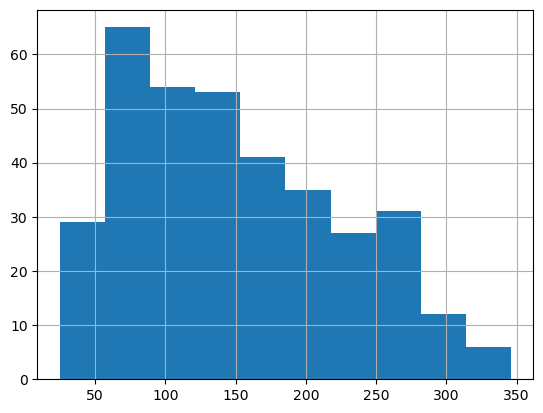

In [5]:
#타겟 확인
y_train.hist()

In [9]:
#선형 회귀 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)
mean_squared_error(y_test, model.predict(X_test))

2707.6318521641574

## 2. 릿지회귀

회귀를 위한 선형 모델

규제(Regularization) 적용

- 오버피팅이 되지 않도록 함

- 규제방식 : L2 규제

- 파라미터(Alpha) 값을 활용해 조절

- Alpha 값이 커질수록 회귀 계수 값을 작게 만듬

![](./img_14.png)